## import neccessary liabraries.....

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv("netflix_titles.csv",encoding='iso-8859-1')

## DROP ALL THE NULL COLUMNS 

In [3]:
df.dropna(axis=1,how="all",inplace=True)

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## FILL ALL THE NULL VALUES IN THE DATA SET...

In [5]:
df["director"]=df["director"].fillna("director is not specified")
df["country"]=df["country"].fillna("country is not specified")
df["cast"]=df["cast"].fillna("cast is not specified")
df["date_added"]=df["date_added"].fillna("date is not specified")
df["rating"]=df["rating"].fillna("rating is not specified")
df["duration"]=df["duration"].fillna("duration is not specified")

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast is not specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,director is not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",country is not specified,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,director is not specified,cast is not specified,country is not specified,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,director is not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      8809 non-null   object
 4   cast          8809 non-null   object
 5   country       8809 non-null   object
 6   date_added    8809 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8809 non-null   object
 9   duration      8809 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [8]:
df.describe()

,release_year
count,8809.000000
mean,2014.181292
std,8.818932
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2024.000000


## Descriptive Statistics

In [9]:
# Basic statistics
print("Number of shows/movies:", df['show_id'].nunique())
print("Number of unique directors:", df['director'].nunique())
print("Number of unique actors:", df['cast'].nunique())
print("Number of unique countries:", df['country'].nunique())
print("\nDistribution of release years:", df['release_year'].value_counts().head(50))
print("\nDistribution of ratings:", df['rating'].value_counts())

Number of shows/movies: 8809
Number of unique directors: 4530
Number of unique actors: 7695
Number of unique countries: 749

Distribution of release years: release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     353
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
2001      45
1999      39
1997      38
2000      37
1998      36
1993      28
1995      25
1996      24
1992      23
1994      22
1990      22
1988      18
1982      17
1991      17
1989      16
1981      13
1986      13
1984      12
1980      11
1979      11
1983      11
1985      10
1973      10
1976       9
1987       8
1974       7
1978       7
1975       7
1977       7
1972       5
Name: count, dtype: int64

Distribution of ratings: rating
TV-MA                      3208
TV-14                      2160
TV-PG                       863
R                         

# plot the graphs.

## Time Series Analysis

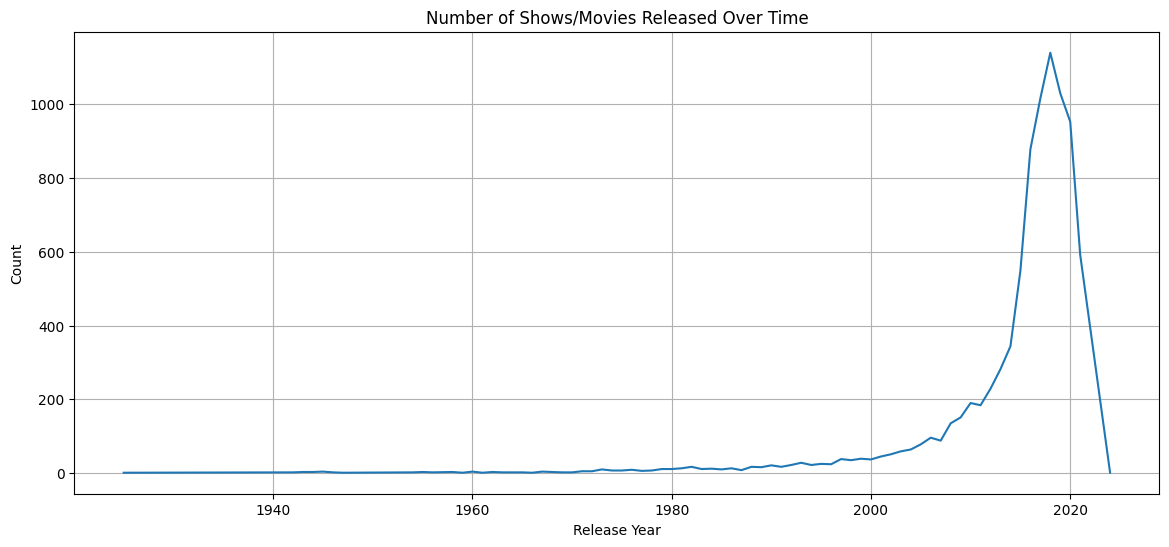

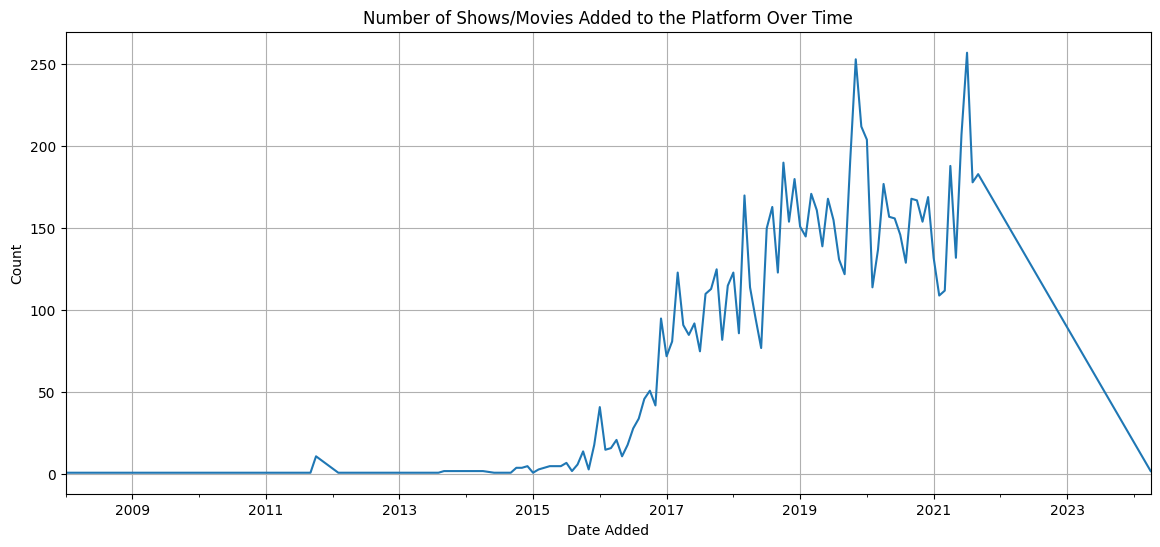

In [10]:


# Convert 'date_added' to datetime, coercing errors to NaT
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce')

# Remove rows with NaT in 'date_added'
df = df.dropna(subset=['date_added'])

# Analyze trends in the number of shows/movies released over time
plt.figure(figsize=(14, 6))
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Shows/Movies Released Over Time')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Analyze trends in the addition of content to the platform
plt.figure(figsize=(14, 6))
df['date_added'].dt.to_period('M').value_counts().sort_index().plot(kind='line')
plt.title('Number of Shows/Movies Added to the Platform Over Time')
plt.xlabel('Date Added')
plt.ylabel('Count')
plt.grid(True)
plt.show()


## Top 10 countries holds the netflix market share 

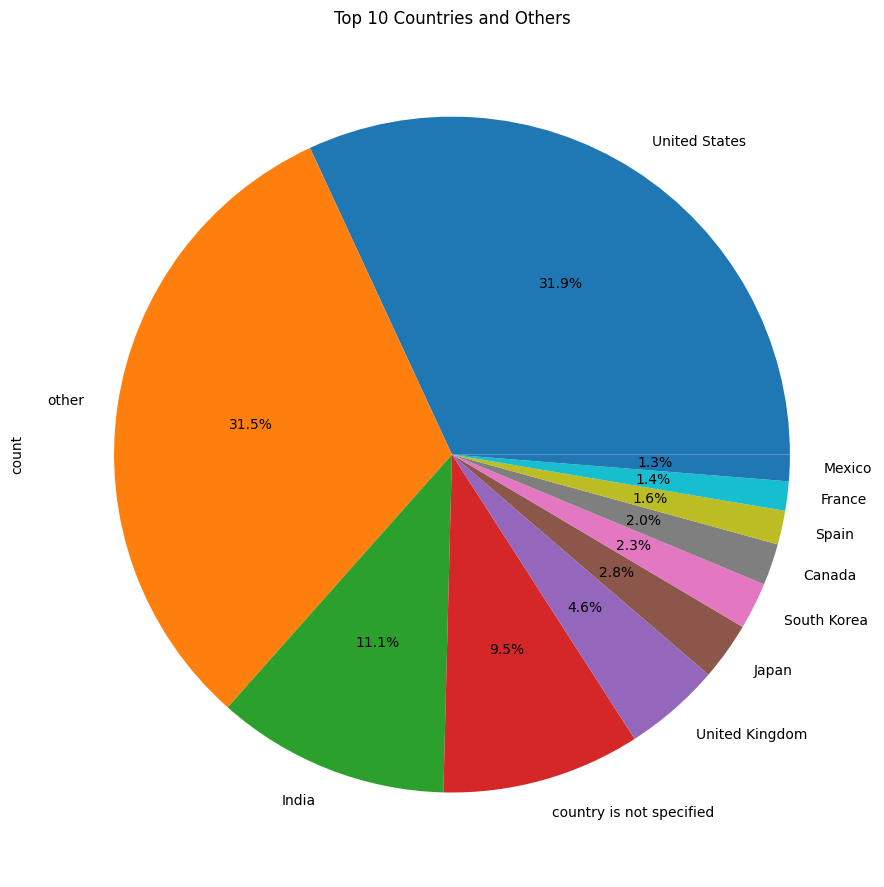

In [11]:




# Calculate value counts for the 'country' column
country_counts = df['country'].value_counts()

# Keep only the top N categories (e.g., top 10)
top_n = 10
top_countries = country_counts.head(top_n).index

# Filter the DataFrame to include only top countries and aggregate the rest
df_top = df.copy()
df_top.loc[~df_top['country'].isin(top_countries),'country'] = 'other'

# Plot the pie chart for top countries
plt.figure(figsize=(9, 9))
df_top['country'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Top {} Countries and Others'.format(top_n))
plt.tight_layout()
plt.show()



## TOP TYPES OF SHOWS ON NETFLIX

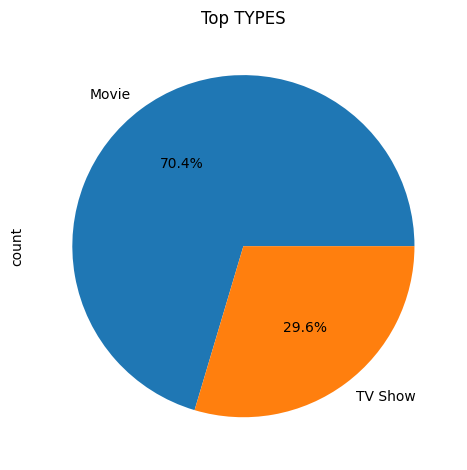

In [12]:

df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Top TYPES')
plt.tight_layout()
plt.show()


## TOP RATINGS....

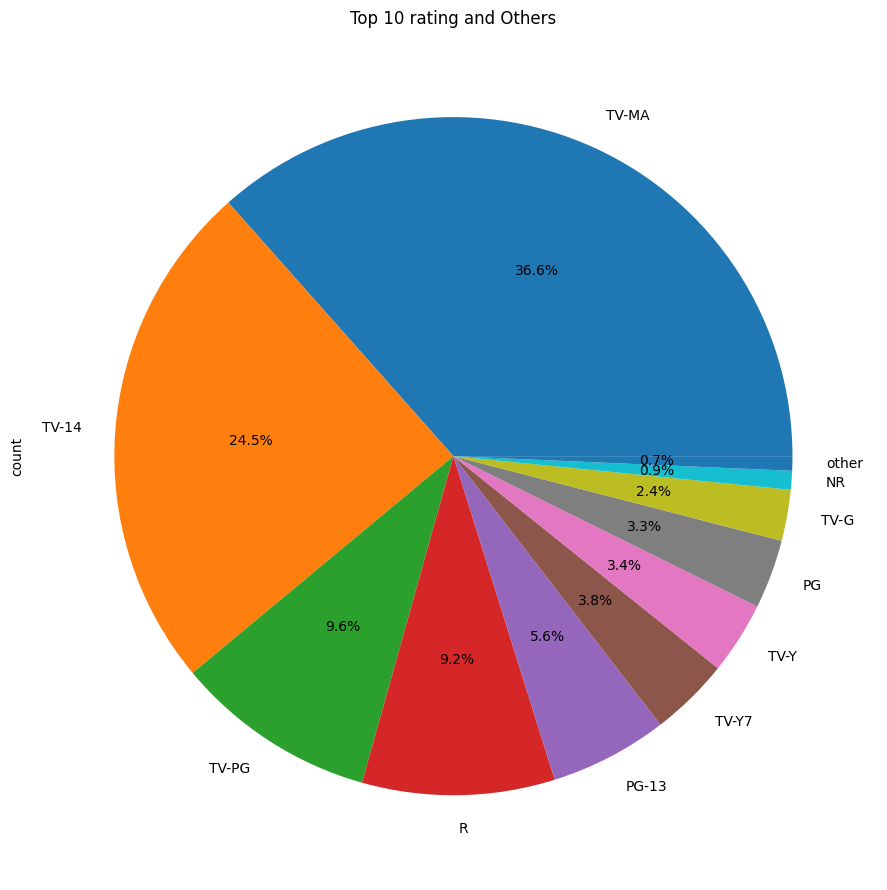

In [13]:

# Calculate value counts for the 'country' column
country_counts = df['rating'].value_counts()

# Keep only the top N categories (e.g., top 10)
top_n = 10
top_countries = country_counts.head(top_n).index

# Filter the DataFrame to include only top countries and aggregate the rest
df_top = df.copy()
df_top.loc[~df_top['rating'].isin(top_countries),'rating'] = 'other'

# Plot the pie chart for top countries
plt.figure(figsize=(9, 9))
df_top['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Top {} rating and Others'.format(top_n))
plt.tight_layout()
plt.show()

## TOP RELEASE YEARS

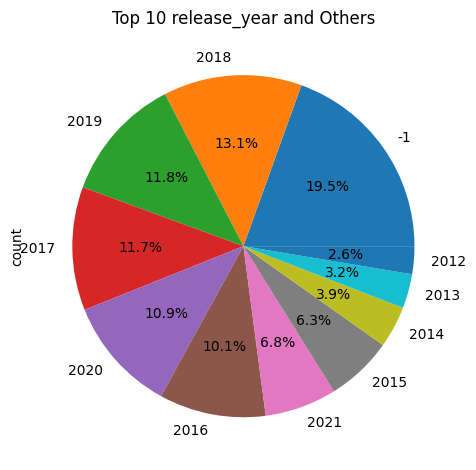

In [14]:

# Calculate value counts for the 'country' column
country_counts = df['release_year'].value_counts()

# Keep only the top N categories (e.g., top 10)
top_n = 10
top_countries = country_counts.head(top_n).index

# Filter the DataFrame to include only top countries and aggregate the rest
df_top = df.copy()
df_top.loc[~df_top['release_year'].isin(top_countries),'release_year'] = -1 #here -1 symbolise the other years......

# Plot the pie chart for top countries
# plt.figure(figsize=(9, 7))
df_top['release_year'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Top {} release_year and Others'.format(top_n))
plt.tight_layout()
plt.show()

## TOP LISTED IN...........

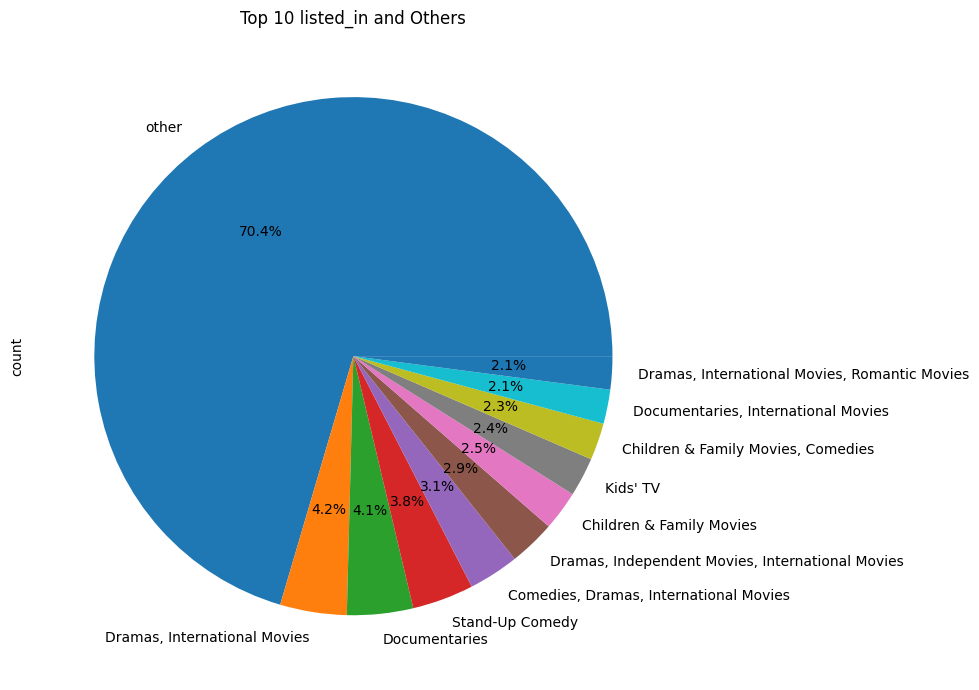

In [15]:
# Calculate value counts for the 'country' column
country_counts = df['listed_in'].value_counts()

# Keep only the top N categories (e.g., top 10)
top_n = 10
top_countries = country_counts.head(top_n).index

# Filter the DataFrame to include only top countries and aggregate the rest
df_top = df.copy()
df_top.loc[~df_top['listed_in'].isin(top_countries),'listed_in'] = 'other'

# Plot the pie chart for top countries
plt.figure(figsize=(9, 7))
df_top['listed_in'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Top {} listed_in and Others'.format(top_n))
plt.tight_layout()
plt.show()

## THANK YOU.............
## I HOPE IT WILL HELP YOU.....